# Machine Learning in R
Tutorial link: (https://machinelearningmastery.com/machine-learning-in-r-step-by-step/)

This tutorial was written and tested with R version 3.2.3. It is recommend that you use this version of R or higher.

In [1]:
library("caret")

Loading required package: ggplot2

Loading required package: lattice



### 2.1 Load the data 

In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

### 2.3. Create a Validation Dataset

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

## 3. Summarize Dataset

Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

* Dimensions of the dataset.
* Types of the attributes.
* Peek at the data itself.
* Levels of the class attribute.
* Breakdown of the instances in each class.

Statistical summary of all attributes.
Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

### 3.1 Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the dim function.

In [5]:
# dimensions of dataset
dim(dataset)

[1] 120   5

### 3.2 Types of Attributes

It is a good idea to get an idea of the types of the attributes. They could be doubles, integers, strings, factors and other types.

Knowing the types is important as it will give you an idea of how to better summarize the data you have and the types of transforms you might need to use to prepare the data before you model it.

In [6]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### 3.3 Peek at the Data

It is also always a good idea to actually eyeball your data.

In [7]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


### 3.4 Levels of the Class
The class variable is a factor. A factor is a class that has multiple class labels or levels. Let’s look at the levels:

In [8]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

Notice above how we can refer to an attribute by name as a property of the dataset. In the results we can see that the class has 3 different labels:

This is a multi-class or a multinomial classification problem. If there were two levels, it would be a binary classification problem.

### 3.5 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count and as a percentage.

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### 3.6 Statistical Summary
Now finally, we can take a look at a summary of each attribute.

This includes the mean, the min and max values as well as some percentiles (25th, 50th or media and 75th e.g. values at this points if we ordered all the values for an attribute).

In [10]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.400   Median :1.300  
 Mean   :5.864   Mean   :3.059   Mean   :3.765   Mean   :1.202  
 3rd Qu.:6.500   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

We can see that all of the numerical values have the same scale (centimeters) and similar ranges [0,8] centimeters.

## 4. Visualize Dataset
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

### 4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

It is helpful with visualization to have a way to refer to just the input attributes and just the output attributes. Let’s set that up and call the inputs attributes x and the output attribute (or class) y.

In [11]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

Given that the input variables are numeric, we can create box and whisker plots of each.

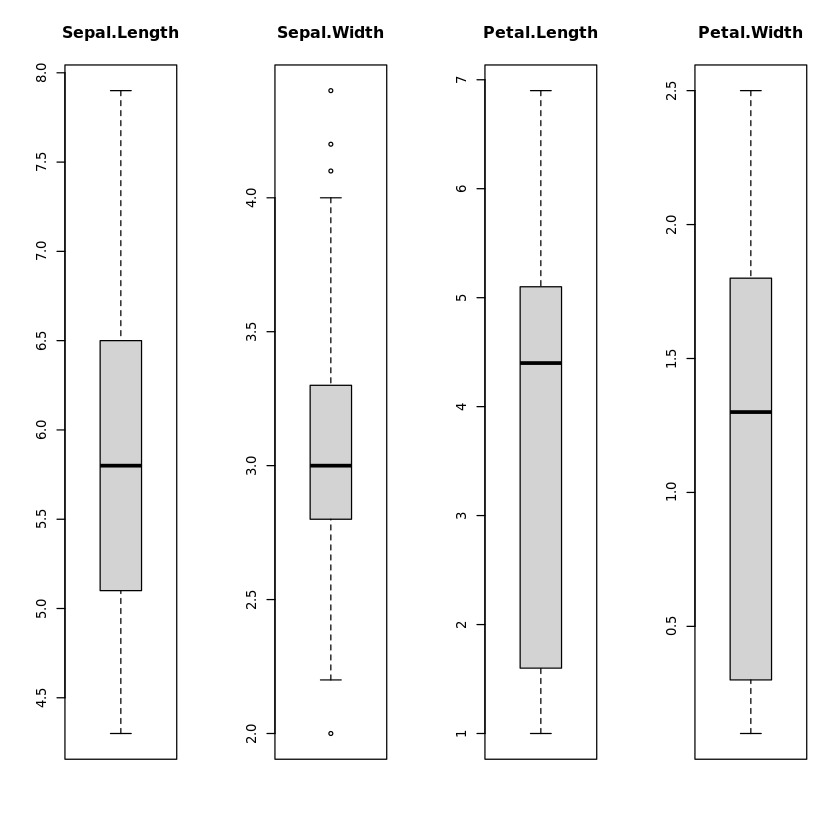

In [12]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

We can also create a barplot of the Species class variable to get a graphical representation of the class distribution (generally uninteresting in this case because they’re even).

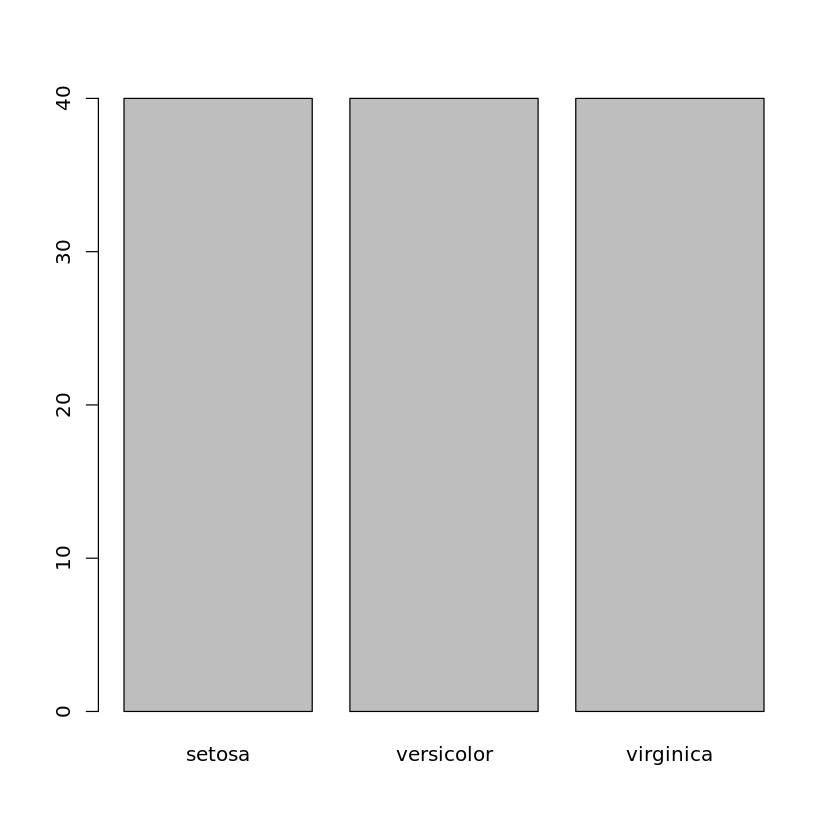

In [15]:
# barplot for class breakdown
plot(y)
# This confirms what we learned in the last section, 
# that the instances are evenly distributed across the three class:

### 4.2 Multivariate Plots
Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes and color the points by class. In addition, because the scatterplots show that points for each class are generally separate, we can draw ellipses around them.

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



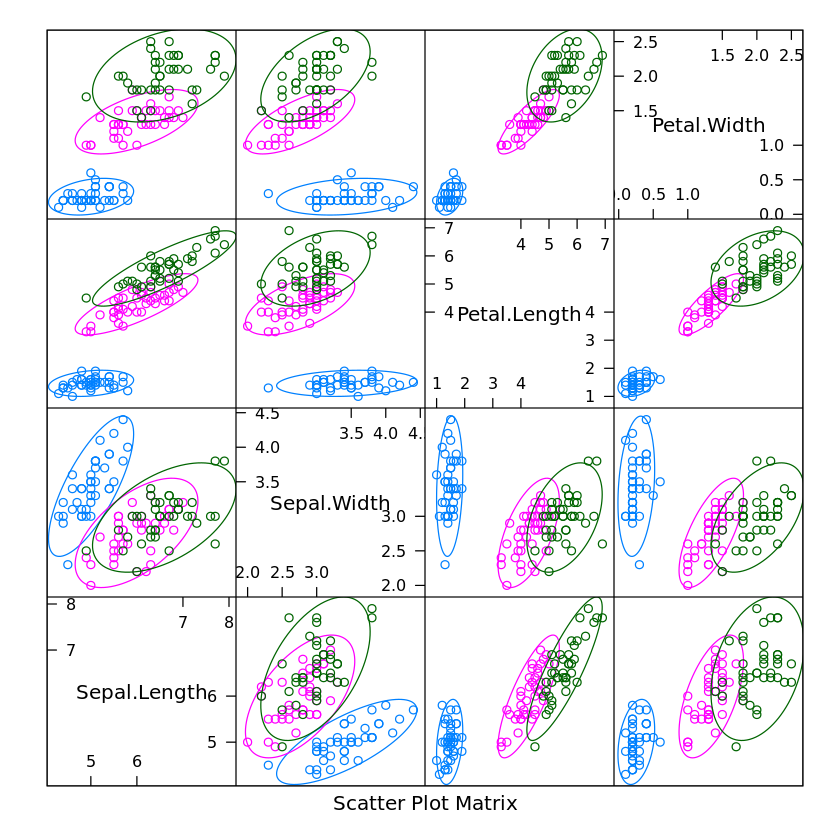

In [17]:
# scatterplot matrix
install.packages("ellipse")
featurePlot(x=x, y=y, plot="ellipse")

We can also look at box and whisker plots of each input variable again, but this time broken down into separate plots for each class. This can help to tease out obvious linear separations between the classes.

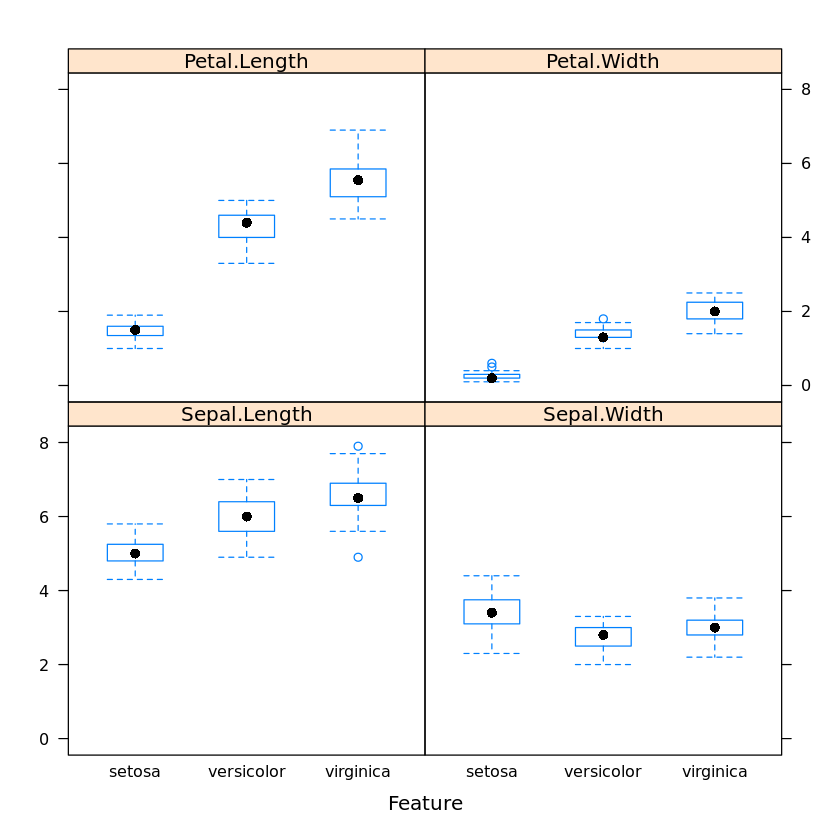

In [18]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

Next we can get an idea of the distribution of each attribute, again like the box and whisker plots, broken down by class value. Sometimes histograms are good for this, but in this case we will use some probability density plots to give nice smooth lines for each distribution.

Like the boxplots, we can see the difference in distribution of each attribute by class value. We can also see the Gaussian-like distribution (bell curve) of each attribute.

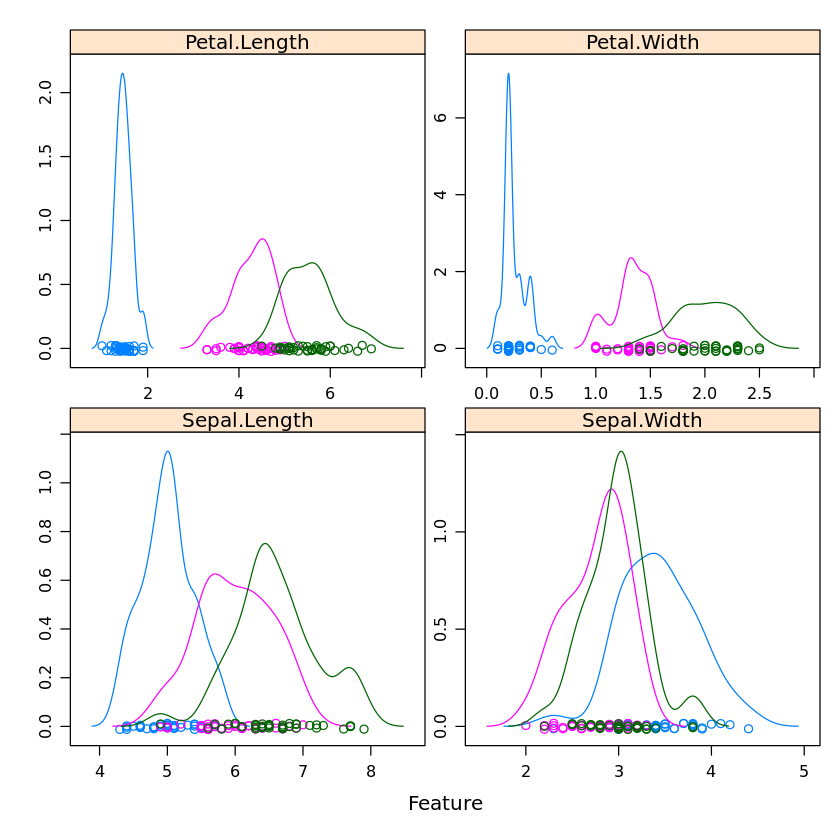

In [19]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## 5. Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Set-up the test harness to use 10-fold cross validation.
2. Build 5 different models to predict species from flower measurements
3. Select the best model.

### 5.1 Test Harness
We will 10-fold crossvalidation to estimate accuracy.

This will split our dataset into 10 parts, train in 9 and test on 1 and release for all combinations of train-test splits. We will also repeat the process 3 times for each algorithm with different splits of the data into 10 groups, in an effort to get a more accurate estimate.

In [20]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

We are using the metric of “Accuracy” to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the metric variable when we run build and evaluate each model next.

### 5.2 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 5 different algorithms:

* Linear Discriminant Analysis (LDA)
* Classification and Regression Trees (CART).
* k-Nearest Neighbors (kNN).
* Support Vector Machines (SVM) with a linear kernel.
* Random Forest (RF)

This is a good mixture of simple linear (LDA), nonlinear (CART, kNN) and complex nonlinear methods (SVM, RF). We reset the random number seed before reach run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build our five models:

In [26]:
urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForest/randomForest_4.6-12.tar.gz"
install.packages(urlPackage, repos=NULL, type="source")

In [28]:
install.packages("kernlab")

# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

Caret does support the configuration and tuning of the configuration of each model, but we are not going to cover that in this tutorial.

### 5.3 Select Best Model
We now have 5 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can report on the accuracy of each model by first creating a list of the created models and using the summary function. We can see the accuracy of each classifier and also other metrics like Kappa:

In [29]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9000000 0.9166667    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333 1.0000000    1    0
rf   0.9166667 0.9166667 0.9583333 0.9583333 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000 1.0000 0.9750   1.000    1    0
cart 0.750 0.78125 0.8750 0.8500   0.875    1    0
knn  0.875 1.00000 1.0000 0.9750   1.000    1    0
svm  0.875 0.87500 0.9375 0.9375   1.000    1    0
rf   0.875 0.87500 0.9375 0.9375   1.000    1    0


We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

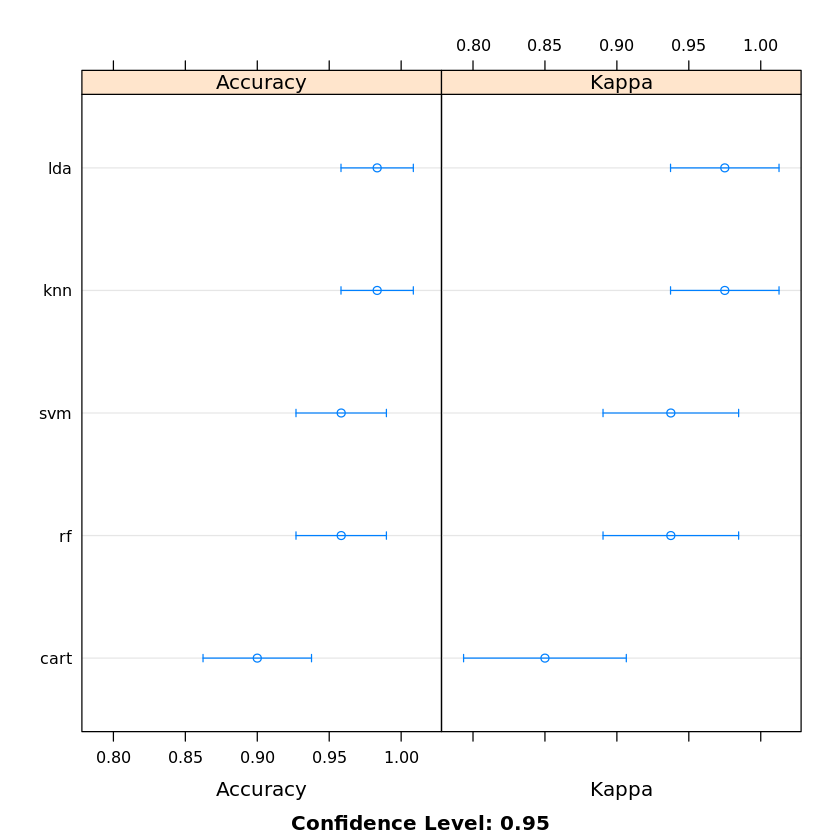

In [30]:
# compare accuracy of models
dotplot(results)

The results for just the LDA model can be summarized. This gives a nice summary of what was used to train the model and the mean and standard deviation (SD) accuracy achieved, specifically 97.5% accuracy +/- 4%

In [31]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



## 6. Make Predictions
The LDA was the most accurate model. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the LDA model directly on the validation set and summarize the results in a confusion matrix.

In [32]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P



We can see that the accuracy is 100%. It was a small validation dataset (20%), but this result is within our expected margin of 97% +/-4% suggesting we may have an accurate and a reliably accurate model.

# **You Can Do Machine Learning in R** 
Work through the tutorial above. It will take you 5-to-10 minutes, max!

You do not need to understand everything. (at least not right now) Your goal is to run through the tutorial end-to-end and get a result. You do not need to understand everything on the first pass. List down your questions as you go. Make heavy use of the ?FunctionName help syntax in R to learn about all of the functions that you’re using.

You do not need to know how the algorithms work. It is important to know about the limitations and how to configure machine learning algorithms. But learning about algorithms can come later. You need to build up this algorithm knowledge slowly over a long period of time. Today, start off by getting comfortable with the platform.

You do not need to be an R programmer. The syntax of the R language can be confusing. Just like other languages, focus on function calls (e.g. function()) and assignments (e.g. a <- “b”). This will get you most of the way. You are a developer, you know how to pick up the basics of a language real fast. Just get started and dive into the details later.

You do not need to be a machine learning expert. You can learn about the benefits and limitations of various algorithms later, and there are plenty of posts that you can read later to brush up on the steps of a machine learning project and the importance of evaluating accuracy using cross validation.

What about other steps in a machine learning project. We did not cover all of the steps in a machine learning project because this is your first project and we need to focus on the key steps. Namely, loading data, looking at the data, evaluating some algorithms and making some predictions. In later tutorials we can look at other data preparation and result improvement tasks.

# **Summary** 
In this post you discovered step-by-step how to complete your first machine learning project in R.

You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with a new platform.
